# Домашняя работа №1 - Метод наименьших квадратов 

**Студент:** Феоктистов Владислав
**Группа:** НПМбд-01-19 (2я погруппа)

**Задача:** приблизить заданную функцию $f(x)$ многочленом вида $w_{0} + w_{1}x + w_{2}x^{2} + ... + w_{n-1}x^{n-1}$, реализовав три метода: *полиномиальная регрессия, полиномиальная регрессия с зашумленными данными, метод наименьших квадратов*. В качестве функции $f(x)$ предлагают взять функцию $f(x) = sin(\frac{x}{5})e^{\frac{x}{10}} + 5e^{-\frac{1}{2}x}$ на отрезке $[1;15]$, однако можно задать и любую другую непрерывную функцию.

## Теория

Многочлен  степени $n-1$ (то  есть $w_{0} + w_{1}x + w_{2}x^{2} + ... + w_{n-1}x^{n-1}$) однозначно определяется любыми $n$ различными точками, через которые он проходит. Это значит, что его $n$ неизвестных коэффициентов $w_{0},w_{1},w_{2},...,w_{n-1}$ можно определить из следующей системы линейных уравнений:

$\begin{equation*}
    \begin{cases}
        w_{0} + w_{1}x_{1} + w_{2}x_{1}^{2} + w_{3}x_{1}^{3} + ... + w_{n-1} x_{1}^{n-1} = f(x_1)
        \\
        \cdots
        \\
        w_{0} + w_{1}x_{n} + w_{2}x_{n}^{2} + w_{3}x_{n}^{3} + ... + w_{n-1}x_{n}^{n-1} = f(x_n)
    \end{cases}
\end{equation*}$

где  через $x_{1},x_{2},...,x_{n}$  обозначены  точки,  через  которые  проходит  многочлен,  а  через $f(x_{1}),f(x_{2}),...,f(x_{n})$ — значения, которые он должен принимать в этих точках. 

## Подготовка

Для начала импортируем все необходимые для выполнения работы библиотеки и введем функцию, которая будет определять заданную функцию на численной прямой.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
"""
Исходная функция
"""
def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

Теперь можно приступить к реализации трех методов.

## Полиномиальная регрессия

Воспользуемся  описанным  свойством  и  будем  находить  приближение  функции многочленом, решая указанную в теории систему линейных уравнений.

Создадим функцию, которая найдет коэффициенты полинома по заданным точкам и значениям функции в них.

In [3]:
def poly_coeff(x, y):
    """
    Находит коэффициенты полинома по указанным точкам и 
    значениям функции в них.
    
    :param x: множество точек
    :param y: множество значений в точках
    
    :return: множество коэффициентов
    """
    n = len(x)
    A = np.ones((n, n))
    A[:, 1:] = np.transpose([x ** i for i in range(1, n)])
    return np.linalg.solve(A, y)

Далее создадим функцию, которая будет находить значение полинома в указанной точке, используя найденные предыдущей функцией коэффициенты полинома.

In [4]:
def poly(w, x):
    """
    Находит значение полинома в указанной точке, используя 
    найденные коэффициенты полинома.
    
    :param w: коэффициенты полинома
    :param x: точка, в которой нужно найти значение полинома
    
    :return: значение полинома в точке
    """
    res = 0
    for i in range(len(w)):
        res += w[i] * (x ** i)
    return res

Теперь можно создать функцию, которая построит два графика на заданном множестве точек: график огинальной функции и график полинома по найденным коэффициентам. 

In [5]:
def graphic(x1, y1, x2, y2, size = 20):
    """
    Строит два графика по точкам x2: график оригинальной функции и
    график полинома по найденным коэффициентам.
    
    :param x1: множество точек, по которым ищутся коэффициенты
    полинома
    :param y1: множество значений в точках x1
    :param x2: множемтво точек, по которым строятся графики
    :param y2: множество значений оригинальной функции в точках x2
    :param size: размер опорных точек
    """
    
    w = poly_coeff(x1, y1)
    
    fig, ax = plt.subplots()

    ax.plot(x2, y2, color='blue', linestyle='-', label='orig')
    ax.plot(x2, poly(w, x2), color='orange', linestyle='--', label='poly')
    ax.scatter(x1, y1, s=size, c='red')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('График')
    ax.legend()

    plt.show()

Посмотрим как будет выглядеть аппроксимация оригинальной функции, используя 5 опорных точек.

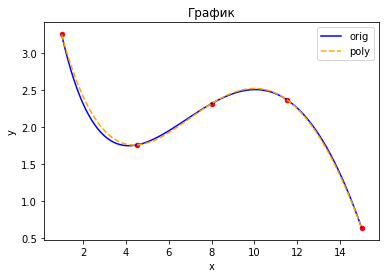

In [6]:
x1 = np.linspace(1, 15, 5)
y1 = f(x1)
x2 = np.linspace(1, 15, 100)
y2 = f(x2)
graphic(x1, y1, x2, y2)

Как видно, при 5и опорных точках, полином уже достаточно хорошо аппроксимирует оригинальную функцию $f(x)$. Попробуем увеличить количество точек до 15и.

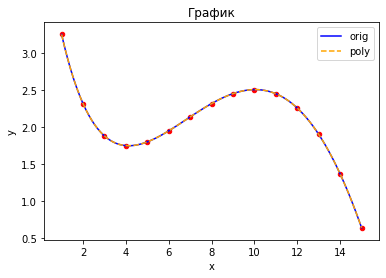

In [7]:
x1 = np.linspace(1, 15, 15)
y1 = f(x1)
graphic(x1, y1, x2, y2)

Точность аппроксимации значительно увеличилась и практически не отличается от оригинала. Таким образом, с ростом числа опорных точек увеличивается точность аппроксимации функции полиномом.

## Полиномиальная регрессия с зашумленными данными

Рассмотрим случай, когда значение функции $f$ известно с некоторой неточностью. Для этого  добавлю  к  значениям  функции $f(x)$  случайный  шум, сгенерированный по гауссовскому распеределению с нулевым средним и стандартным отклонением $\sigma=0.01$.

Для этого изменим функцию, которая находит коэффициенты полинома.

In [8]:
def poly_coeff(x, y, noise = 0.01):
    """
    Находит коэффициенты полинома по указанным точкам и 
    значениям функции в них с использованием шума в данных.
    
    :param x: множество точек
    :param y: множество значений в точках
    :noise: шум, по стандарту 0.01
    
    :return: множество коэффициентов
    """
    n = len(x)
    # Добавляется шум
    b = y + np.random.randn(n) * noise
    A = np.ones((n, n))
    A[:, 1:] = np.transpose([x ** i for i in range(1, n)])
    return np.linalg.solve(A, b)

Посмотрим как теперь будет выглядеть аппроксимация с 5ю и 15ю опорными точками.

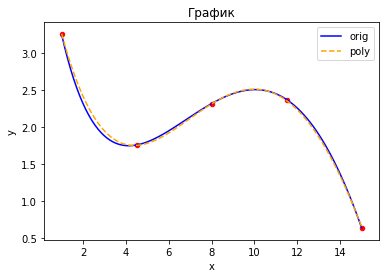

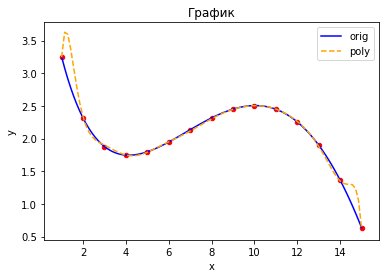

In [9]:
x1 = np.linspace(1, 15, 5)
y1 = f(x1)
graphic(x1, y1, x2, y2)

x1 = np.linspace(1, 15, 15)
y1 = f(x1)
graphic(x1, y1, x2, y2)

Как видно, при использовании шума в данных ситуации становится координальнально обратной: с ростом числа опорных точек точность аппроксимации падает. Однако все же точек должно быть не менее 3х.

## Метод наименьших квадратов

Выше мы  строили  полиномиальную  регрессию  той  степени,  которая  соответствовала числу точек. Т.е. при количестве точек равных n мы получали полином степени $n-1$. На практике обычно ограничиваются полиномами степени не выше третьей, независимо от количества имеющихся точек. 

Рассмотрим  теперь  случай,  когда  точек  много.  Пусть  количество  точек  равно $N$,  а полином по-прежнему имеет вид $w_{0} + w_{1}x + w_{2}x^{2} + ... + w_{n-1}x^{n-1}$, причём $N>n$. Тогда в  системе линейных уравнений вида количество уравнений будет больше, чем число неизвестных.  Подобного  рода  система  уравнений  может  не  иметь  точного  решения, особенно в случае, когда правая часть является приближённой, т.е. с шумом. В таких случаях, вместо точного решения системы уравнений обычно решают задачу минимизации невязки уравнений: 

$\min_{x} \lVert Ax-b \rVert$, 

где в качестве нормы $\lVert * \rVert$ обычно используют квадратичную норму. Поэтому такой подход называют методом наименьших квадратов.

Таким образом, используя этот подход, можно избежать главного недостатка полиномиальной регрессии: для наилучшей аппроксимации нужны полиномы большой степени, что не удобно для вычислений.

Для реализации данного подхода будет использоваться псевдо-обратная матрица Мура-Пенроуза: $Ax = b => x = A^{+}b = (A^{T}A)^{-1}A^{T}b$.

Добавим функцию, которая будет находить псевдо-обратную матрицу Мура-Пенроуза, и немного изменим функцию, находящую коэффициенты полинома.

In [10]:
def piMPm(A):
    """
    pimMP (pseudo-inverse Moore-Penrose matrix)
    Находит псевдо-обратную матрицу Мура-Пенроуза для
    указанной матрицы.
    
    :param A: исходная матрица
    :return: псевдо-обратная матрица Мура-Пенроуза
    """
    B = A.transpose() @ A
    if np.linalg.det(B) != 0:
        return np.linalg.inv(B) @ A.transpose()

In [11]:
def poly_coeff(x, y, power = 3):
    """
    Находит коэффициенты полинома по указанным точкам и 
    значениям функции в них.
    
    :param x: множество точек
    :param y: множество значений в точках
    :noise: шум, по стандарту 0.01
    
    :return: множество коэффициентов
    """
    n = len(x)
    A = np.ones((n, power + 1))
    A[:, 1:] = np.transpose([x ** i for i in range(1, power + 1)])
    return piMPm(A) @ y

Посмотрим как будет выглядеть кубический полином на основе 100 опорных точек с использованием шума в исходных данных.

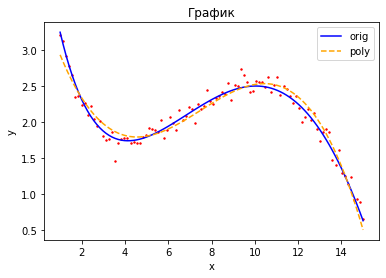

In [12]:
noise = 0.1
n = 100
x1 = np.linspace(1, 15, n)
y1 = f(x1) + np.random.randn(n) * noise
graphic(x1, y1, x1, f(x1), size = 2)

В итоге получаем достаточно хорошее приближение, несмотря на большой шум в исходных данных.